# How to validate your Pixel Identification

After you have classified some Electron Microscopy (EM) images, you might be interessted in the statistics of this classification, like the accuracy, recall or precision. 

Because each different classification probably has different labels and orders, it is not possible to create a dynamic template. So instead of a pipeline, like the other notebooks, this notebook will serve as an example/tutorial to show how you can validate your results using our Validator class.

## Imports

Before you can use the validator, it needs to be imported.

In [1]:
# Setting the correct working directory
import os
os.chdir("../../")

# Importing the Validator and ConfusionMatrix classes
from pixel_identification.functions import create_color_dict
from pixel_identification.image_manipulator import image_to_array
from pixel_identification.Validation import *

# Importing matplotlib for showing images (Not Required, but can be nice for extra visualisation)
from matplotlib import image as mpimg
from matplotlib import pyplot as plt

## Setting the Parameters

The final preperatory step is setting the parameters.

It is important to note that the colors belonging to the labels should match. So if the nucleus was red in the original, it should also be red in this version, otherwise the statistics will not be valid.

*The final parameter is the color layer used during training. Because you need that color layer to create the confusion matrix, I recreated it in this example. In your own project you will probably still have access to that color layer, so remaking it would not be necessary, but if it is, you can simply use the function created for it*

In [2]:
# Classified Image (Outfile from the pipeline)
classified_image = "data/Results/test_classified.png"

# Validation color layer showing how it should have been
validation_image = "data/Test_Images/Color_Layers/3_test_3_classes.png"

# To prevent errors with the images varying in size, a resize parameter also needs to be set to ensure equal sized images.
resize = 400

# Training color layer (Only required if there is no longer access to it)
training_colors = "data/Train_Images/Color_Layers/3_training_3_classes.png"

# Creating the color dict (Only required if there is no longer access to it)
color_layer_array = image_to_array(training_colors, resize, rgb=True)
color_dict = create_color_dict(color_layer_array)

## Comparing the Images

To get a feel for the results, without seeing the numbers, the images are plotted side by side for easy comparison.

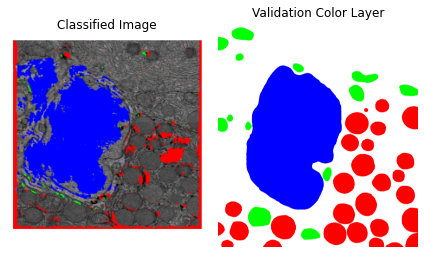

In [3]:
# Creating tuples for both the images with the file name and title
images = [(classified_image, "Classified Image"), (validation_image, "Validation Color Layer")]

# Creating the 1 by 2 structure
fig, axes = plt.subplots(nrows=1, ncols=2)

# Show the images with their titles
for imp, ax in zip(images, axes.ravel()):
    img = mpimg.imread(imp[0])
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(imp[1])
fig.tight_layout()

*Figure1: The classified image on the left, with the corresponding validation image on the right*

## Creating the confusion matrix

The confusion matrix will contain the True Positive (TP), False Positives (FP), True Negatives (TN) and False Negatives (FN) for each of the classes. This means that more classes, will result in a bigger, more complex confusion matrix.

For ease, the confusion matrix is shown as a dictionary, with the class being the key, and the value being another dict with the TP, FP, TN, FN values as keys.

In [4]:
# Creating the ConfusionMatrix object
confusion_matrix = ConfusionMatrix(classified_image, validation_image, color_dict, resize)
        
# Getting and printing the confusion matrix alongside the color layer for reference
conf_matrix = confusion_matrix.get_confusion_matrix()
print(confusion_matrix.color_dict)
print(conf_matrix)

{0: [255, 0, 0], 1: [0, 255, 0], 2: [0, 0, 255]}
{0: {'TN': 131444, 'FP': 4743, 'FN': 22568, 'TP': 1245}, 1: {'TN': 153384, 'FP': 14, 'FN': 6602, 'TP': 0}, 2: {'TN': 120347, 'FP': 4416, 'FN': 11507, 'TP': 23730}, 3: {'TN': 25331, 'FP': 40321, 'FN': 8817, 'TP': 85531}}


## Selecting classes of interest

The classified image shows the nucleus being nicely colored, just like the vesicles. The mitochondria however, are not colored at all. So these classes will all be selected and further analyzed.

In [5]:
# The nucleus is colored blue, which corresponds to [0, 0, 255] for RGB. This means that class 2 is the nucleus
nucleus = conf_matrix[2]

# The vesicles are colored red, which corresponds to [255, 0, 0] for RGB. This means that class 0 is the vesicles
vesicles = conf_matrix[0]

# The mitochondria are supposed to be green, as seen in the validation image. Green corresponds to [0, 255, 0] for RGB,
# which means that class 1 is the mitochondria
mitochondria = conf_matrix[1]

## Creating Validator objects

The selected classes will now be converted to validator objects, which allows for the statistic functions to be called on them.

In [6]:
# You could simply skip the step above and provide the dict index to the function, but it is done like this for the example!
vesicles = Validator(vesicles)

mitochondria = Validator(mitochondria)

nucleus = Validator(nucleus)

## Getting the statistics

By calling the different functions on each of the validator objects, the accuracy, precision and recall values will be caluclated and shown below.

*You can structure and call these however you want, but for this example they are simply printed in order*

In [7]:
print("Accuracy:")
print("Nucleus Accuracy: ", nucleus.get_accuracy())
print("Vesicles Accuracy: ", vesicles.get_accuracy())
print("Mitochondria Accuracy: ", mitochondria.get_accuracy())
print("---------------------------------------------------------------------------------------")
print("Precision:")
print("Nucleus Precision: ", nucleus.get_precision())
print("Vesicles Precision: ", vesicles.get_precision())
print("Mitochondria Precision: ", mitochondria.get_precision())
print("---------------------------------------------------------------------------------------")
print("Recall:")
print("Nucleus Recall: ", nucleus.get_recall())
print("Vesicles Recall: ", vesicles.get_recall())
print("Mitochondria Recall: ", mitochondria.get_recall())

Accuracy:
Nucleus Accuracy:  0.90048125
Vesicles Accuracy:  0.82930625
Mitochondria Accuracy:  0.95865
---------------------------------------------------------------------------------------
Precision:
Nucleus Precision:  0.8431038158175229
Vesicles Precision:  0.20791583166332667
Mitochondria Precision:  0.0
---------------------------------------------------------------------------------------
Recall:
Nucleus Recall:  0.6734398501575048
Vesicles Recall:  0.05228236677445093
Mitochondria Recall:  0.0
